# Star Wars Survey

In this project, we'll be analyzing data on the *Star Wars* movies. While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed *Star Wars* fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

## Overview

In [1]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The data has several columns, including:

+ `RespondentID` - An anonymized ID for the respondent (person taking the survey)
+ `Gender` - The respondent's gender
+ `Age` - The respondent's age
+ `Household Income` - The respondent's income
+ `Education` - The respondent's education level
+ `Location (Census Region)` - The respondent's location
+ `Have you seen any of the 6 films in the Star Wars franchise?` - Has a `Yes` or `No` response
+ `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a `Yes` or `No` response

There are several other columns containing answers to questions about the *Star Wars* movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, we'll need to remove the invalid rows. For example, `RespondentID` is supposed to be a unique ID for each respondent, but it's blank in some rows. We'll need to remove any rows with an invalid `RespondentID`.

In [3]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars['RespondentID'].isnull().sum()

0

## Cleaning and Maping Yes/no Columns

Let's take a look at the next two columns, which are:

+ `Have you seen any of the 6 films in the Star Wars franchise?`
+ `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent `Yes/No` questions. They can also be `NaN` where a respondent chooses not to answer a question. We can use the [pandas.Series.value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

We can use the [pandas.Series.map()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) method on series objects to perform the conversion.

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
yes_no = {
    'Yes' : True,
    'No' : False,
    'Response' : np.nan
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

+ `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
+ `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
+ `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
+ `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
+ `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
+ `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

In [8]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [9]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

+ `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. `- How much the respondent liked `Star Wars: Episode I The Phantom Menace`.
+ `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`.
+ `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`.
+ `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`.
+ `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`.
+ `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`.

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [10]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars.iloc[:,9:15].dtypes

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    float64
Unnamed: 10                                                                                                                                      float64
Unnamed: 11                                                                                                                                      float64
Unnamed: 12                                                                                                                                      float64
Unnamed: 13                                                                                                                                      float64
Unnamed: 14                                                                                                                                      float64
dtype: object

In [11]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns using the [pandas.DataFrame.mean()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) method on dataframes.

In [12]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

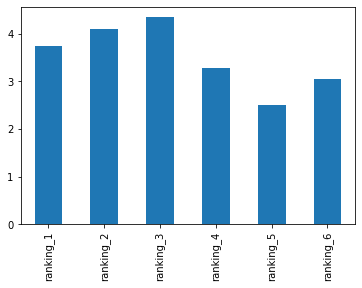

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

star_wars[star_wars.columns[9:15]].mean().plot.bar()

The team at [FiveThirtyEight](http://fivethirtyeight.com/) was interested in answering a particular question: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?** Looking at these results, it looks like the rest of America **does** realize that “The Empire Strikes Back” is clearly the best of the bunch, since it has the lowest mean (remember that a lower ranking is better!)

## Finding the Most Viewed Movie

Earlier in this project, we cleaned up the `seen` columns and converted their values to the Boolean type. When we call methods like [pandas.DataFrame.sum()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html) or `mean()`, they treat Booleans like integers. They consider `True` a `1`, and `False` a `0`. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

In [14]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

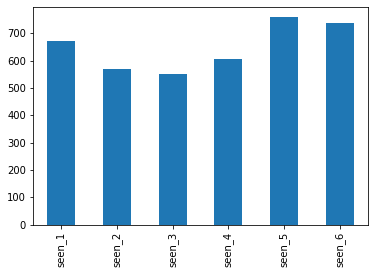

In [15]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()

Again, "The Empire Strikes Back" is the most watched movie of the whole saga.

## Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

+ `Do you consider yourself to be a fan of the Star Wars film franchise?` - `True` or `False`
+ `Do you consider yourself to be a fan of the Star Trek franchise?` - `Yes` or `No`
+ `Gender` - `Male` or `Female`

We can split a dataframe into two groups based on a binary column by creating two subsets of that column. Let's start with the fans or not of the franchise.

ranking_1    4.141304
ranking_2    4.342391
ranking_3    4.417423
ranking_4    2.932971
ranking_5    2.333333
ranking_6    2.829710
dtype: float64


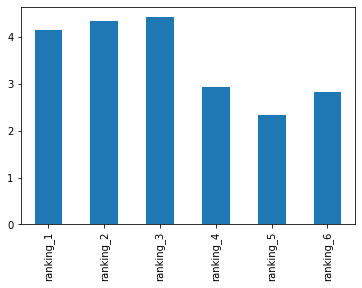

In [16]:
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]

## Highest-ranked movie
print(fans[fans.columns[9:15]].mean())
fans[fans.columns[9:15]].mean().plot.bar()

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64


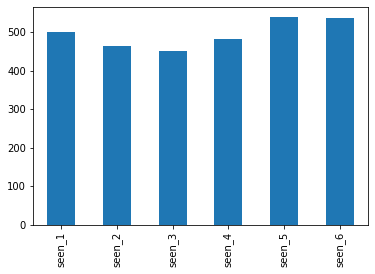

In [17]:
## Most watched movie
print(fans[fans.columns[3:9]].sum())
fans[fans.columns[3:9]].sum().plot.bar()

ranking_1    2.936396
ranking_2    3.591549
ranking_3    4.193662
ranking_4    3.933099
ranking_5    2.862676
ranking_6    3.471831
dtype: float64


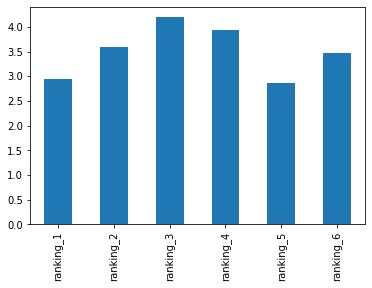

In [18]:
non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

## Highest-ranked movie
print(non_fans[non_fans.columns[9:15]].mean())
non_fans[non_fans.columns[9:15]].mean().plot.bar()

seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64


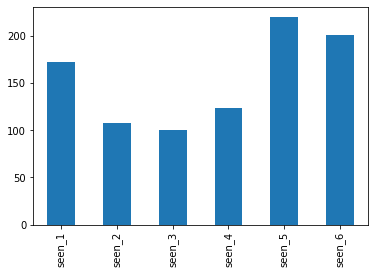

In [19]:
## Most watched movie
print(non_fans[non_fans.columns[3:9]].sum())
non_fans[non_fans.columns[3:9]].sum().plot.bar()

Both fans and not voted "The Empire Strikes Back" as the best movie of the *Star Wars* franchise. It is also the most watched movie from both groups. Let's move to the fans or not of the *Star Trek* franchise.

ranking_1    3.968675
ranking_2    4.255422
ranking_3    4.403382
ranking_4    3.110843
ranking_5    2.407229
ranking_6    2.850602
dtype: float64


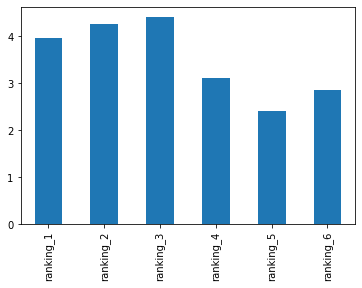

In [20]:
star_trek_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']

## Highest-ranked movie
print(star_trek_fans[star_trek_fans.columns[9:15]].mean())
star_trek_fans[star_trek_fans.columns[9:15]].mean().plot.bar()

seen_1    364
seen_2    336
seen_3    322
seen_4    342
seen_5    397
seen_6    396
dtype: int64


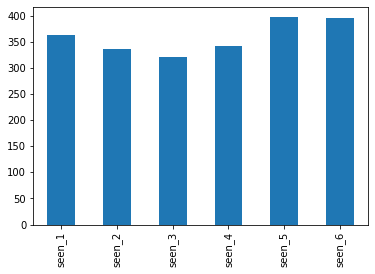

In [21]:
## Most watched movie
print(star_trek_fans[star_trek_fans.columns[3:9]].sum())
star_trek_fans[star_trek_fans.columns[3:9]].sum().plot.bar()

ranking_1    3.487864
ranking_2    3.915254
ranking_3    4.278450
ranking_4    3.433414
ranking_5    2.634383
ranking_6    3.244552
dtype: float64


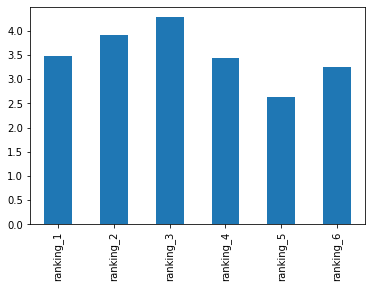

In [22]:
not_star_trek_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'No']

## Highest-ranked movie
print(not_star_trek_fans[not_star_trek_fans.columns[9:15]].mean())
not_star_trek_fans[not_star_trek_fans.columns[9:15]].mean().plot.bar()

seen_1    301
seen_2    228
seen_3    221
seen_4    258
seen_5    353
seen_6    334
dtype: int64


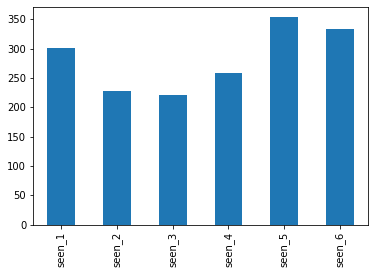

In [23]:
## Most watched movie
print(not_star_trek_fans[not_star_trek_fans.columns[3:9]].sum())
not_star_trek_fans[not_star_trek_fans.columns[3:9]].sum().plot.bar()

Also for this two groups, "The Empire Strikes Back" is both the highest ranked and the most watched movie. Let's move into the final two groups, `Males` and `Females`.

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64


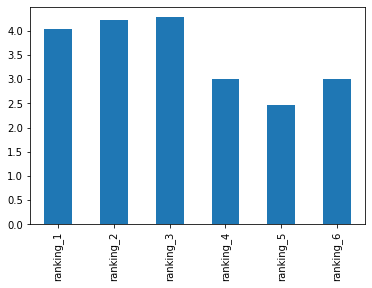

In [24]:
males = star_wars[star_wars['Gender'] == 'Male']

## Highest-ranked movie
print(males[males.columns[9:15]].mean())
males[males.columns[9:15]].mean().plot.bar()

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64


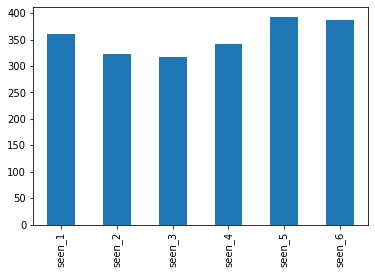

In [25]:
## Most watched movie
print(males[males.columns[3:9]].sum())
males[males.columns[3:9]].sum().plot.bar()

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64


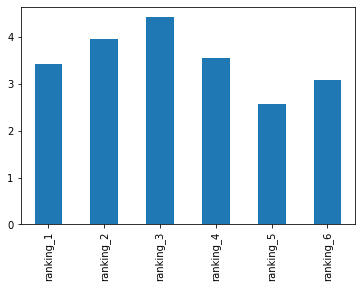

In [26]:
females = star_wars[star_wars['Gender'] == 'Female']

## Highest-ranked movies
print(females[females.columns[9:15]].mean())
females[females.columns[9:15]].mean().plot.bar()

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64


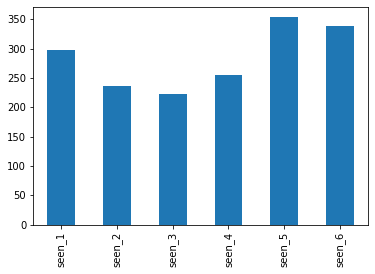

In [27]:
## Most watched movie
print(females[females.columns[3:9]].sum())
females[females.columns[3:9]].sum().plot.bar()

Also for these last two groups, "The Empire Strikes Back" is both the highest ranked and the most watched movie. To answer the team at [FiveThirtyEight](http://fivethirtyeight.com/) we can say that the rest of America **does** realize that “The Empire Strikes Back” is clearly the best of the bunch.